# Problem Statement:
You are a Data Scientist at XYZ Corporation. Their customers are asking for a movie recommender
system. Your task is to build a movie recommender system out of an existing movie and user rating data.
The system should be able to take users movie ratings as input and provide movie recommendation
based on those ratings.
You have been asked to:

Read the data given in both ratings and movies files.

Merge those datasets into one.

Extract columns with useful information.

Generate a pivot table.

Perform data cleaning by dropping users with less than 10 reviews.

Create a correlation matrix

Get user input by getting movie names and ratings from user.

Generate Recommendations based on user preferences and correlation matrix that the user
provides.

In [1]:
#Read the data given in both ratings and movies files.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_csv(r"H:\Intellipaat data science\Mahcine learning intellipaat\Assignments\Movie recommendation\ratings.csv")

In [4]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movie_titles = pd.read_csv(r"H:\Intellipaat data science\Mahcine learning intellipaat\Assignments\Movie recommendation\movies.csv")

In [6]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
#Merge those datasets into one.
Df2 = pd.merge(df1,movie_titles,on="movieId")
Df2.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
Df2['userId'].value_counts(ascending=True)

442      20
431      20
569      20
595      20
406      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: userId, Length: 610, dtype: int64

In [10]:
Df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(Df2.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [12]:
ratings['num of ratings'] = pd.DataFrame(Df2.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

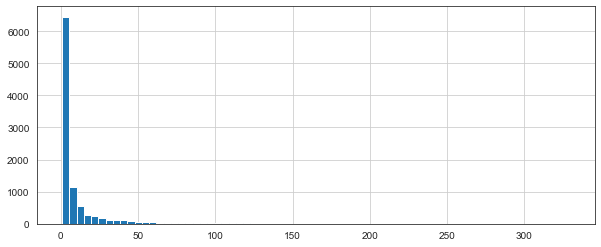

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

plt.figure(figsize = (10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

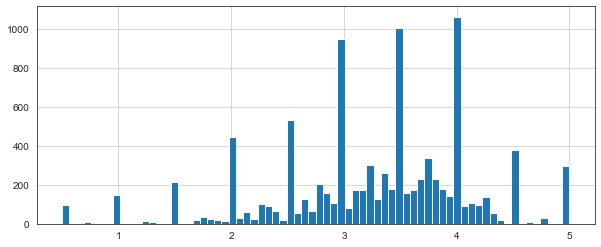

In [15]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins=70)

In [16]:
#Generate a pivot table.

In [17]:
moviepivot = Df2.pivot_table(index='userId', columns='title', values='rating')
moviepivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
f=['count','mean']
dataset_cust_summary = Df2.groupby('userId')['rating'].agg(f)
dataset_cust_summary.head()

,count,mean
userId,,
1,232,4.366379
2,29,3.948276
3,39,2.435897
4,216,3.555556
5,44,3.636364


In [20]:
#Perform data cleaning by dropping users with less than 10 reviews.

In [21]:
cust_benchmark = 10
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([], dtype='int64', name='userId')

In [22]:
#There seems to be no customers with reviews less than 10 so changing the value to 50 

In [23]:
cust_benchmark = 50

In [24]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([  2,   3,   5,   8,   9,  12,  13,  14,  25,  26,
            ...
            569, 574, 575, 576, 578, 581, 589, 595, 598, 609],
           dtype='int64', name='userId', length=225)

In [25]:
NewDF = Df2[~Df2['userId'].isin(drop_cust_list)]

In [26]:
#Df2 shape before dropping the customers.
Df2.shape

(100836, 6)

In [27]:
# NewDF shape before dropping the customers.
NewDF.shape

(93812, 6)

In [29]:
moviepivot_new = NewDF.pivot_table(index='userId', columns='title', values='rating')
moviepivot_new.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
NewRatings = pd.DataFrame(NewDF.groupby('title')['rating'].mean())
NewRatings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [31]:
NewRatings = NewRatings['num of ratings'] = pd.DataFrame(NewDF.groupby('title')['rating'].count())
NewRatings.head()

,rating,num of ratings
title,,
'71 (2014),1,1
'Hellboy': The Seeds of Creation (2004),1,1
'Round Midnight (1986),2,2
'Salem's Lot (2004),1,1
'Til There Was You (1997),2,2


In [32]:
NewRatings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),263,263
Pulp Fiction (1994),244,244
"Shawshank Redemption, The (1994)",235,235
"Matrix, The (1999)",229,229
"Silence of the Lambs, The (1991)",222,222
Star Wars: Episode IV - A New Hope (1977),210,210
Jurassic Park (1993),202,202
Star Wars: Episode V - The Empire Strikes Back (1980),186,186
Fight Club (1999),185,185


In [33]:
#Considering 2 movies .Forrest Gump and Jurassic Park and creating a correlation between the two

In [34]:
NewRatings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),263,263
Pulp Fiction (1994),244,244
"Shawshank Redemption, The (1994)",235,235
"Matrix, The (1999)",229,229
"Silence of the Lambs, The (1991)",222,222
Star Wars: Episode IV - A New Hope (1977),210,210
Jurassic Park (1993),202,202
Star Wars: Episode V - The Empire Strikes Back (1980),186,186
Fight Club (1999),185,185


In [35]:
ForrestGump_user_ratings = moviepivot_new['Forrest Gump (1994)']
JurassicPark_user_ratings = moviepivot_new['Jurassic Park (1993)']
ForrestGump_user_ratings.head()

userId
1     4.0
4     NaN
6     5.0
7     5.0
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [36]:
similar_to_ForrestGump = moviepivot.corrwith(ForrestGump_user_ratings)
similar_to_JurassicPark = moviepivot.corrwith(JurassicPark_user_ratings)

C:\Users\india\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\india\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [37]:
corr_ForrestGump = pd.DataFrame(similar_to_ForrestGump, columns=['Correlation'])
corr_ForrestGump.dropna(inplace=True)
corr_ForrestGump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234289
*batteries not included (1987),0.946100
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [38]:
corr_ForrestGump.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962),1.0
Runner Runner (2013),1.0
Excess Baggage (1997),1.0
Get a Job (2016),1.0
Walkabout (1971),1.0
Moonlight Mile (2002),1.0
Soul Plane (2004),1.0
Rose Red (2002),1.0
It Might Get Loud (2008),1.0


In [39]:
corr_ForrestGump = corr_ForrestGump.join(ratings['num of ratings'])
corr_ForrestGump.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234289,42
*batteries not included (1987),0.946100,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [41]:
#Movie prediction for the users who have viewed Forrest Gump

corr_ForrestGump[corr_ForrestGump['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
American History X (1998),0.471310,129
Aladdin (1992),0.470946,183
Good Will Hunting (1997),0.464671,141
Braveheart (1995),0.458882,237


# END OF ASSIGNMENT